Veer Khosla and Saad Khan

Fall 2024

CS 343: Neural Networks

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from adaline import Adaline

# Set the color style so that Professor Layton can see your plots
plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
# Make the font size larger
plt.show()
plt.rcParams.update({'font.size': 18})

# Turn off scientific notation when printing
np.set_printoptions(suppress=True, precision=3)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Project 1 | Single-Layer Networks

In this project, you will implement single-layer neural networks that includes the same fundamental components as larger multi-layer networks. You will get familiar with the most common "neural network workflow":
- preprocessing data
- training a neural network
- evaluating test data
- examining performance metrics

We will take advantage of the relative simplicity of single-layer neural networks to analyze and visualize the learned class decision boundaries (*this is more difficult and less intuitive in more complex neural networks that we will study!*).

You will also investigate how the same neural network architecture can be used for both classification and regression with only modest changes.

#### Reminders

- In this class, use `numpy ndarray` (`np.array()`), not Numpy Matrix.
- To help safeguard against data loss when working in a jupyter notebook, make sure the notebook is `Trusted` (Top right corner of notebook when opened in your browser). This will ensure your work autosaves. **I still recommend manually saving at least every few minutes with (Control+S / Cmd+S)**

## Task 1: Implement the ADAptive LInear NEuron (ADALINE) network for binary classification

In Task 1, complete the methods of the `Adaline` class in `adaline.py`. This includes:

- `net_input(self, features)`
- `activation(self, net_in)`
- `loss(self, errors)`
- `accuracy(self, y, y_pred)`
- `gradient(self, errors, features)`

- `predict(self, features)`
- `fit(self, features, y, n_epochs, lr)`

**Important:** Before starting, read through the method descriptions and expected inputs/outputs. It probably would be a good idea to tackle simpler/smaller methods first, then use them in more complex ones. For example, it may be a good idea to work on `net_input` first because it is required to complete `fit`. There is test code below.

Here is a summary of the ADALINE network equations

##### Net input

$\vec{x}_i$ is one of the $N$ data sample vectors from the dataset matrix $A$. That is, `x_i.shape = (M,)`.

$$\text{netIn}_i = \sum_{j=1}^M x_{ij} w_j + b$$

##### Net activation

Identity function:

$$ f(x) = x $$

So:

$$\text{netAct}_i = \text{netIn}_i$$


##### Loss: Sum of squared error

$$L(\vec{w}) = \frac{1}{2} \sum_{i=1}^N \left ( y_i - \text{netAct}_i \right )^2 $$

##### Gradient (bias)

$$\frac{\partial L}{\partial b} = -\sum_{i=1}^N \left ( y_i - \text{netAct}_i \right )$$

##### Gradient (wts)

Below, $x_{ij}$ is the $j^{th}$ feature of the data sample vector $\vec{x}_i$.

$$\frac{\partial L}{\partial w_j} = -\sum_{i=1}^N \left ( y_i - \text{netAct}_i \right ) x_{ij}$$

##### Gradient descent (delta rule)

$$b(t+1) = b(t) - \eta \frac{\partial L}{\partial b}$$
$$w_j(t+1) = w_j(t) - \eta \frac{\partial L}{\partial w_j}$$

above $\eta$ is the learning rate, and $N$ is the training set (number of data samples in training epoch).

### 1a. Test your ADALINE implementation

In [113]:
net = Adaline()

#### Test `loss` function

In [114]:
rng = np.random.default_rng(0)
randErrors = np.array([-0.535,  0.222, -0.391,  0.196, -0.29 , -1.953])
net_act = rng.random(len(randErrors))
debugLoss = net.loss(randErrors, net_act)
print(f'Your loss is {debugLoss:.4f} and it should be 5.5122')

Your loss is 5.5122 and it should be 5.5122


#### Test `accuracy` function

In [115]:
randClasses1 = np.where(randErrors >= 0, 1, -1)
randClasses2 = np.roll(randClasses1, 1)
acc1 = net.accuracy(randClasses1, randClasses1)
acc2 = net.accuracy(randClasses1, randClasses2)
print(f'Test 1: Your accuracy is {acc1} and it should be 1.0')
print(f'Test 2: Your accuracy is {acc2:.4f} and it should be 0.3333')

Test 1: Your accuracy is 1.0 and it should be 1.0
Test 2: Your accuracy is 0.3333 and it should be 0.3333


#### Test `gradient` function

In [116]:
rng = np.random.default_rng(0)
randFeatures = rng.normal(loc=0, scale=1, size=(15,4))
randErrors1 = rng.normal(loc=0, scale=1, size=(15,))
randBiasGrad, randWtGrad = net.gradient(randErrors1, randFeatures)
print(f'Test 1: Your bias gradient is {randBiasGrad:.3f} and it should be -3.985')
print(f'Test 2: Your wt gradient is {randWtGrad} and it should be [-5.231 -0.2    6.001  6.55 ]')

Test 1: Your bias gradient is -3.985 and it should be -3.985
Test 2: Your wt gradient is [-5.231 -0.2    6.001  6.55 ] and it should be [-5.231 -0.2    6.001  6.55 ]


#### Test `predict` function

In [117]:
rng = np.random.default_rng(0)
inputs = rng.standard_normal([10, 4])
net.wts = rng.standard_normal(4)
net.b = rng.standard_normal(1)
y_pred = net.predict(inputs)
print(f'Your predicted classes are {y_pred}.\n            They should be [ 1  1 -1  1  1  1 -1 -1  1  1]')

Your predicted classes are [ 1  1 -1  1  1  1 -1 -1  1  1].
            They should be [ 1  1 -1  1  1  1 -1 -1  1  1]


#### Test `fit` function

In [118]:
rng = np.random.default_rng(0)
net = Adaline()
inputs = rng.standard_normal([9, 6])
y = np.sign(rng.standard_normal(9))
loss, acc = net.fit(inputs, y, r_seed=0)
print(f'Your end-of-training loss / accuracy are\n{loss[-1]:.4f} / {acc[-1]:.4f}.\nThey should be\n0.5495 / 1.0000.')
print(f'Your wts after training are:\n{net.get_wts()}\nand should be\n[-0.288  1.361 -0.203 -0.084 -0.245 -0.501]')

Your end-of-training loss / accuracy are
0.5497 / 1.0000.
They should be
0.5495 / 1.0000.
Your wts after training are:
[-0.287  1.36  -0.21  -0.084 -0.248 -0.494]
and should be
[-0.288  1.361 -0.203 -0.084 -0.245 -0.501]


### 1b. Load in and preprocess old faithful data

In this task, you will be working with the old faithful dataset. Here is a description of the dataset:

    Waiting time between eruptions and the duration of the eruption for the Old Faithful geyser in Yellowstone National Park, Wyoming, USA.

    Variables:
    ----------
    sample     numeric      Measurement number
    eruptions  numeric      Eruption time in mins
    waiting    numeric      Waiting time to next eruption
    severe     categorical  Whether the eruption was "severe"
                            (+1: severe, -1 not severe)

Write code to do the following in the below cell.

1. Load in `old_faithful.csv`, represent the data using a ndarray. Select the `eruptions` and `waiting` variables for your features.  Shape = [Num samps, Num features] = [272, 2].
2. Assign the output classes (**severe**) to a separate 1D ndarray vector. Shape=(272,)
3. Preprocess the data by performing min-max normalization across features (i.e. "per-variable"/"separately").
4. Use matplotlib to create a scatter plot of the normalized data, color-coding data points according to their class
5. I suggest using pandas, but you're welcome to do this however you like.

**Make sure that executing the below cell results in an inline scatter plot, color-coded by class.**

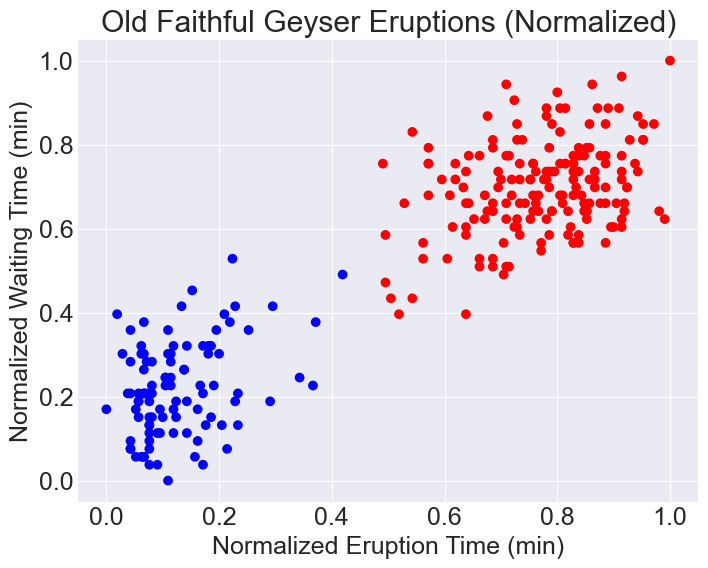

In [144]:
# YOUR CODE HERE
df = pd.read_csv('data/old_faithful.csv')

features = df[['eruptions', 'waiting']].values
output_classes = df['severe'].values

features_min = features.min(axis=0)
features_max = features.max(axis=0)
normalized_features = (features - features_min) / (features_max - features_min)

plt.figure(figsize=(8, 6))
colors = np.where(output_classes == 1, 'r', 'b')  # Red for severe, blue for not severe

plt.scatter(normalized_features[:, 0], normalized_features[:, 1], c=colors, label='Severe')

plt.xlabel('Normalized Eruption Time (min)')
plt.ylabel('Normalized Waiting Time (min)')
plt.title('Old Faithful Geyser Eruptions (Normalized)')
plt.show()

### 1c. Train ADALINE on normalized Old Faithful data using default hyperparameters (i.e. learning rate, epochs)

Print out the final loss and accuracy, then use the provided function to plot your training results inline in the below cell.

By the final epoch, training loss should reach ~11.36 and accuracy ~100%.

In [145]:
adaline = Adaline()
loss_history, acc_history = adaline.fit(normalized_features, output_classes, n_epochs=1000, lr=0.001)

final_loss = loss_history[-1]
final_accuracy = acc_history[-1]

print(f'Final loss: {final_loss:.2f}')
print(f'Final accuracy: {final_accuracy * 100:.2f}%')

Final loss: 11.36
Final accuracy: 100.00%


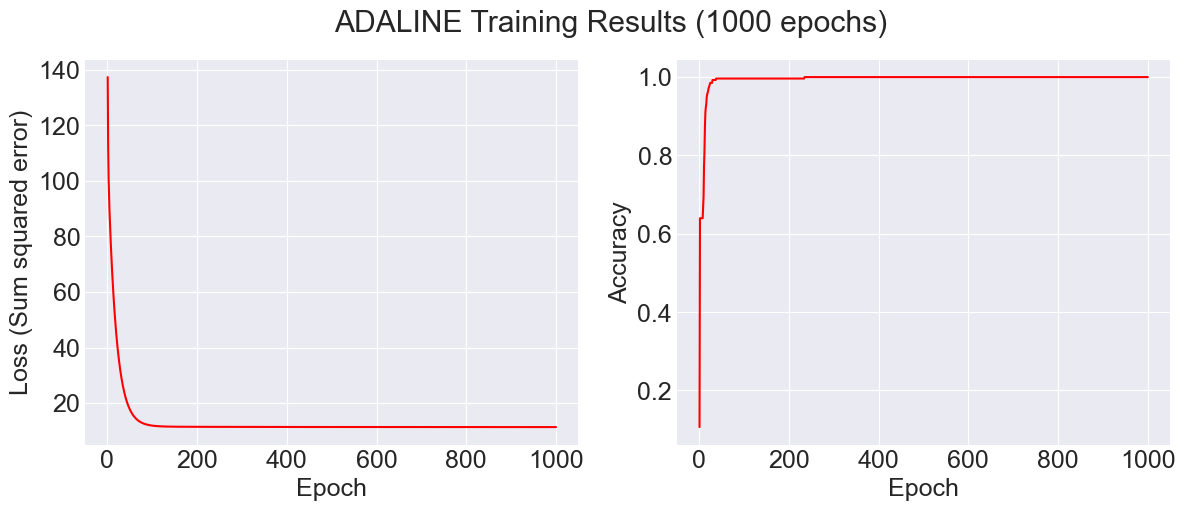

In [146]:
def plot_adaline_train(net, loss_list, acc_list, plotMarkers=False, title='ADALINE'):
    '''Helper plotting function provided for you.'''
    n_epochs = len(loss_list)

    x = np.arange(1, n_epochs+1)

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    fig.suptitle(f'{title} ({n_epochs} epochs)')

    curveStr = '-r'
    if plotMarkers:
        curveStr += 'o'

    ax1.plot(x, loss_list, curveStr)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss (Sum squared error)')
    ax2.plot(x, acc_list, curveStr)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')

    plt.show()

plot_adaline_train(adaline, loss_history, acc_history, title="ADALINE Training Results")

#### Questions

**Question 1.** Based on your loss and accuracy curves, does it look like your network learned to classify the old faithful data? Why or why not?

**Answer 1:**

The network seems to have successfully learned to classify the Old Faithful data, but since we didn’t split the data into training and test sets and the dataset is relatively small, it may not perform well when generalizing to unseen data.

## Task 2: Feature scaling and hyperparameters


### 2a. Feature scaling

Copy your code from Task 1 to import the Old Faithful data, but this time don't normalize before training.

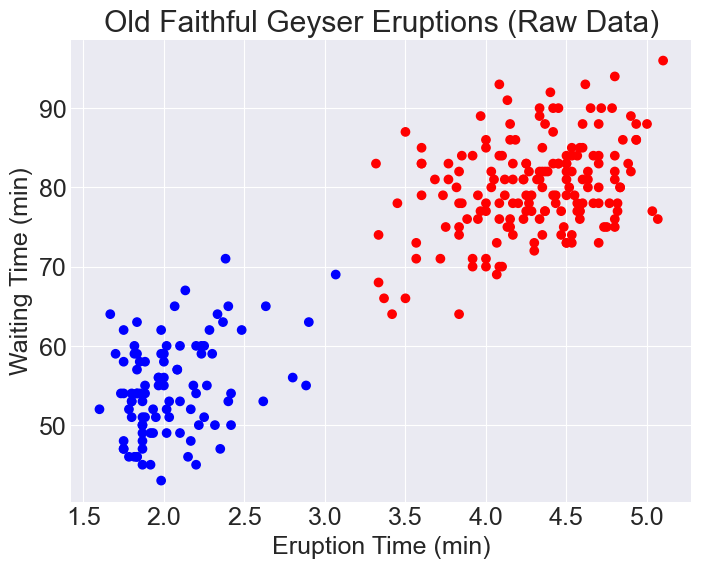

Final loss: 4497547211446548862999905595439637947247258670062084848945099693015692475070010391931486956608552943044028010896293888.0000
Final accuracy: 0.6397


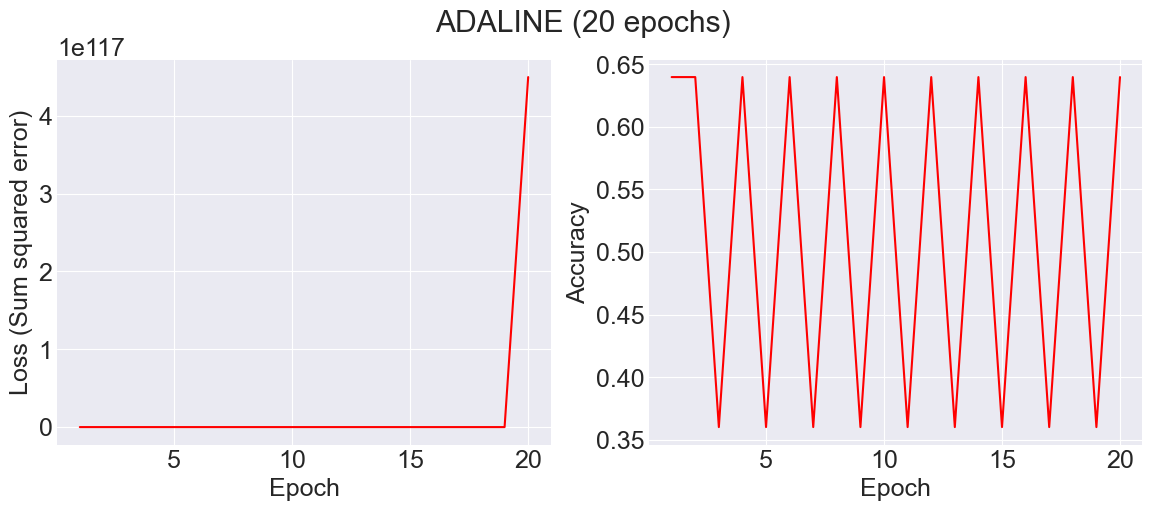

In [158]:
df = pd.read_csv('data/old_faithful.csv')

features = df[['eruptions', 'waiting']].values  # These are your X
output_classes = df['severe'].values  # These are your y

plt.figure(figsize=(8, 6))
colors = np.where(output_classes == 1, 'r', 'b')  # Color severe eruptions as red

plt.scatter(features[:, 0], features[:, 1], c=colors, label='Severe')

plt.xlabel('Eruption Time (min)')
plt.ylabel('Waiting Time (min)')
plt.title('Old Faithful Geyser Eruptions (Raw Data)')
plt.show()

net = Adaline()
loss, acc = net.fit(features, np.squeeze(output_classes), n_epochs=20)  # Use features and output_classes

print(f'Final loss: {loss[-1]:.4f}')
print(f'Final accuracy: {acc[-1]:.4f}')

plot_adaline_train(net, loss[:20], acc[:20])


#### Questions

**Question 2.** What happens to the loss when we don't normalize the features before training? Why?

**Answer 2:**

When we don't normalize the features before training, significant issues arise, as the gradient becomes imbalanced, causing the network to struggle with minimizing the loss function. As a result, it overshoots during updates leading to the loss increasing rapidly, potentially reaching infinity.

### 2b. Test how individually standardizing your features affects the rate at which loss decreases over epochs

1. Write code in the cell below to train the network on standardized features. Recall that standardizing a variable means applying the transformation $\frac{x - \mu}{\sigma}$. The mean and standard deviation should be computed over the entire dataset and separately per feature.
2. Plot the loss and accuracy.

**The cell should generate an inline pair of plots when executed**.

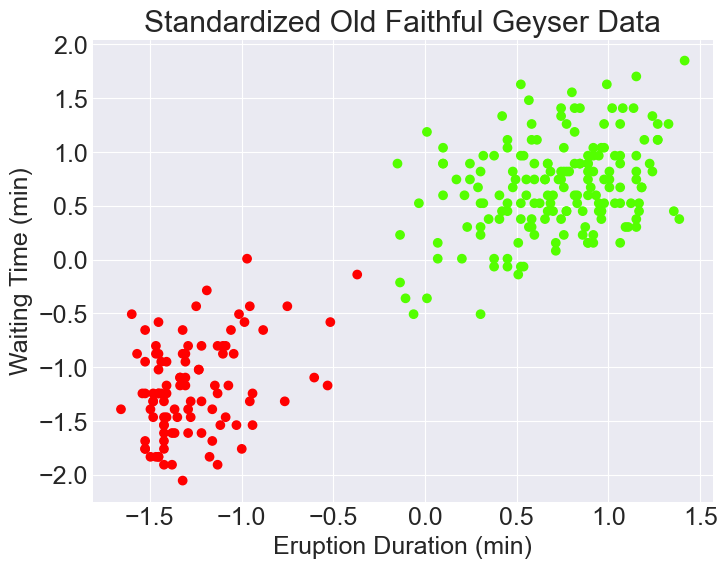

Final loss: 11.35
Final accuracy: 100.00%


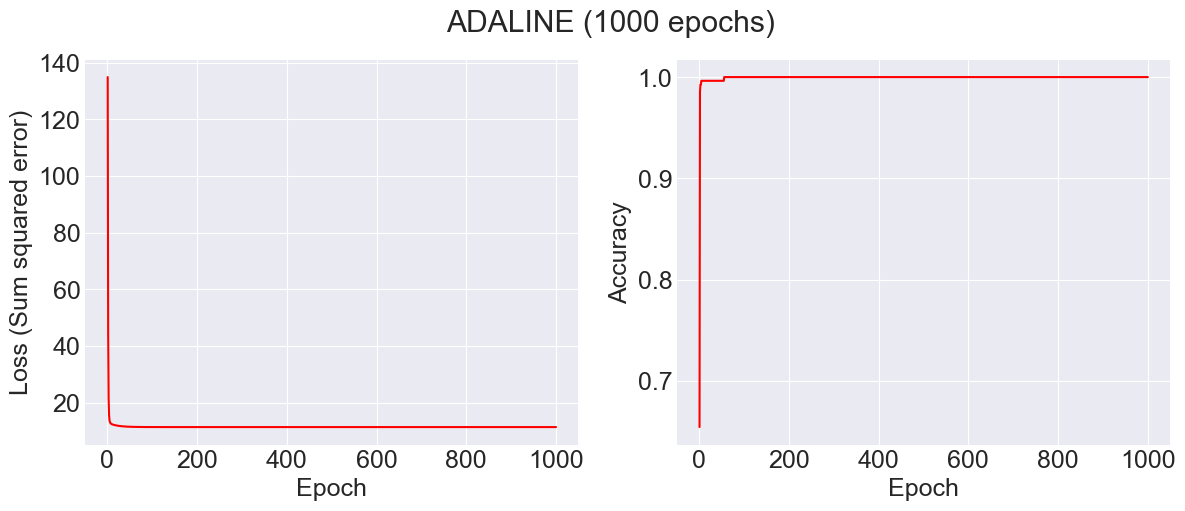

In [161]:
df = pd.read_csv('data/old_faithful.csv')

features = df[['eruptions', 'waiting']].values
output_classes = df['severe'].values

features_standardized = (features - features.mean(axis=0)) / features.std(axis=0)

plt.figure(figsize=(8, 6))
plt.scatter(features_standardized[:, 0], features_standardized[:, 1], c=output_classes, cmap='prism')
plt.title("Standardized Old Faithful Geyser Data")
plt.xlabel("Eruption Duration (min)")
plt.ylabel("Waiting Time (min)")
plt.show()

adaline = Adaline()
loss_history, acc_history = adaline.fit(features_standardized, np.squeeze(output_classes), n_epochs=1000, lr=0.001)

final_loss = loss_history[-1]
final_accuracy = acc_history[-1]
print(f'Final loss: {final_loss:.2f}')
print(f'Final accuracy: {final_accuracy * 100:.2f}%')

plot_adaline_train(adaline, loss_history, acc_history)

#### Questions

**Question 3.** Explain the similarities/differences in loss and accuracy curves between these plots and those that you made in Task 1.

**Answer 3:**

While the final accuracy is the same as in Task 1, it is reached more quickly. The loss function also decreases faster compared to Task 1, which can be attributed to the improved standardization. Standardizing the data makes it easier for the network to efficiently descend the gradient, as the data becomes more symmetric, leading to smoother learning.

### 2c. Influence of learning rate

This subtask focuses on the influence of learning rate (a model **hyperparameter**) on the quality of neural network training.

#### Questions

**Question 4:** Make small changes to the learning rate hyperparameter below. How does it affect the loss? **Make 1+ plots that clearly support what you notice.**

**Answer 4:**

As the learning rate increases slightly, the loss initially shows minimal change but rapidly escalates to extremely large values. For example, between 0.001 and 0.005, the loss jumps from around 11 to infinity. This phenomenon aligns with the "barrelling out" effect we discussed in class.

C:\Users\veerk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\veerk\Desktop\Computer Science\CS343\Project 1\adaline.py:106: RuntimeWarning: overflow encountered in square
  y: ndarray. Shape = [Num samples N,]


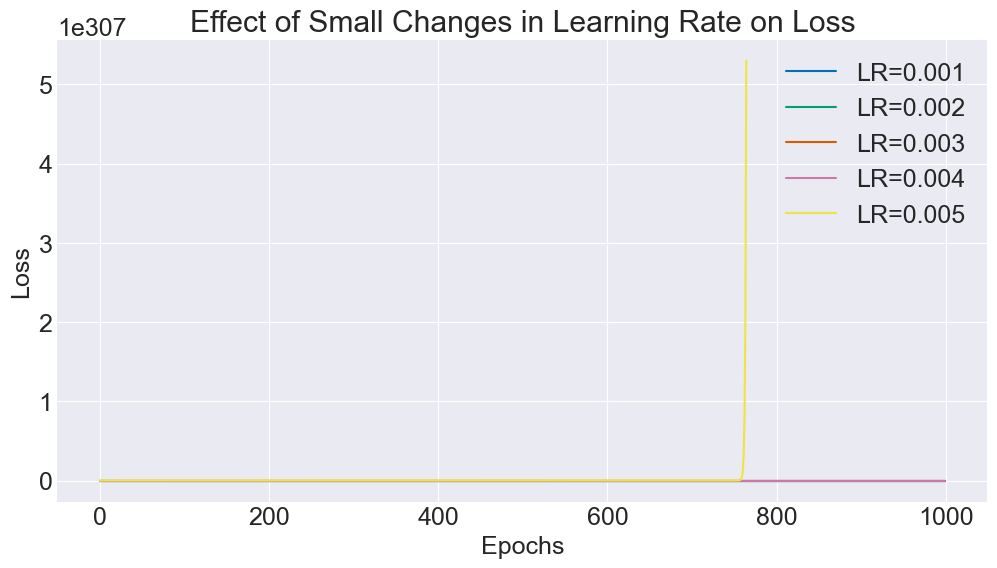

In [165]:
df = pd.read_csv('data/old_faithful.csv')

# Extract features and output classes
features = df[['eruptions', 'waiting']].values
output_classes = df['severe'].values

# Standardize the features
features_standardized = (features - features.mean(axis=0)) / features.std(axis=0)

# Test small learning rates (from 0.001 to 0.005)
learning_rates = [0.001, 0.002, 0.003, 0.004, 0.005]

plt.figure(figsize=(12, 6))

for lr in learning_rates:
    # Initialize and train ADALINE model with different learning rates
    adaline = Adaline()
    loss_history, acc_history = adaline.fit(features_standardized, np.squeeze(output_classes), n_epochs=1000, lr=lr)

    # Plot loss history for each learning rate
    plt.plot(loss_history, label=f'LR={lr}')

# Plot settings
plt.title('Effect of Small Changes in Learning Rate on Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Question 5:** What happens to the loss if the learning rate is increased by several orders of magnitude? Why? **Make 1+ plots that clearly support what you notice.**

**Answer 5:**

When the learning rate is increased by several orders of magnitude, the model becomes unstable, with the loss function oscillating or increasing rapidly, as weight updates become too large and cause the model to overshoot optimal values, preventing effective minimization of the loss.

C:\Users\veerk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\veerk\Desktop\Computer Science\CS343\Project 1\adaline.py:106: RuntimeWarning: overflow encountered in square
  y: ndarray. Shape = [Num samples N,]
C:\Users\veerk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


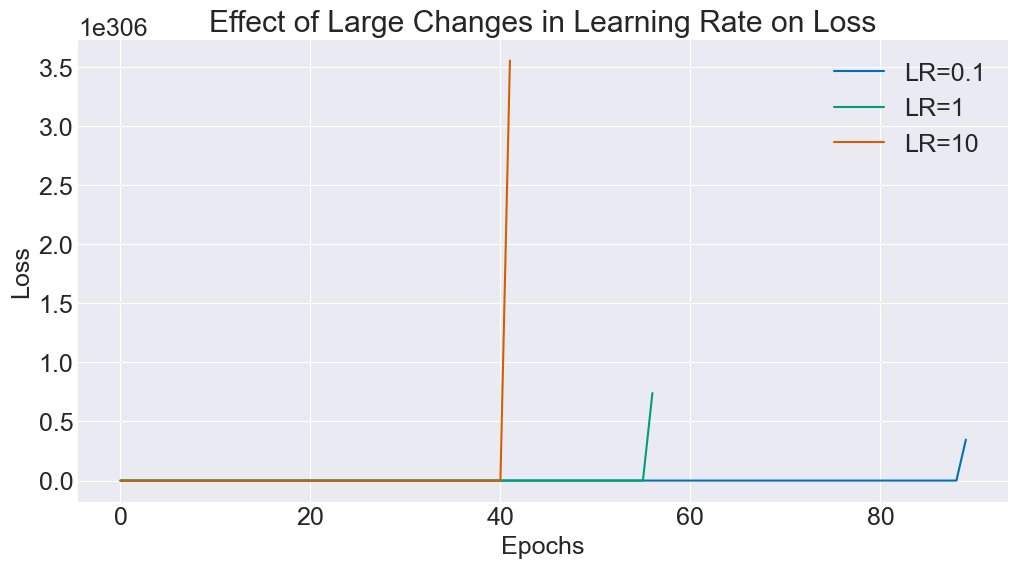

In [166]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the Old Faithful dataset
df = pd.read_csv('data/old_faithful.csv')

# Extract features and output classes
features = df[['eruptions', 'waiting']].values
output_classes = df['severe'].values

# Standardize the features
features_standardized = (features - features.mean(axis=0)) / features.std(axis=0)

# Test very large learning rates (e.g., 0.1, 1, 10)
large_learning_rates = [0.1, 1, 10]

plt.figure(figsize=(12, 6))

for lr in large_learning_rates:
    # Initialize and train ADALINE model with different large learning rates
    adaline = Adaline()
    loss_history, acc_history = adaline.fit(features_standardized, np.squeeze(output_classes), n_epochs=1000, lr=lr)

    # Plot loss history for each large learning rate
    plt.plot(loss_history, label=f'LR={lr}')

# Plot settings
plt.title('Effect of Large Changes in Learning Rate on Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### 2d. Visualize class boundaries

For this subtask, you will plot the boundary between points (`eruptions`, `waiting` feature pairs) that get classified as severe (+1) or not (-1). To get there, fill in the blanks and answer the questions below.

In [168]:
# Print your learned wts and bias here after training net on standardized samples
df = pd.read_csv('data/old_faithful.csv')
features = df[['eruptions', 'waiting']].values
output_classes = df['severe'].values
features_standardized = (features - features.mean(axis=0)) / features.std(axis=0)
adaline = Adaline()
loss_history, acc_history = adaline.fit(features_standardized, np.squeeze(output_classes), n_epochs=1000, lr=0.001)

print(f"Weights: {adaline.get_wts()}")
print(f"Bias: {adaline.get_bias()}")

Weights: [0.704 0.229]
Bias: 0.27941176470588186


#### Questions

**Question 6.** What is the meaning of each of the above learned weights with respect to the variables/features in the dataset?

*Hint:* Look at your `net_in` equation, look at the features that you feed into the model, look at the scatterplot you made in 1b, think about what features are present in a single training sample.

**Question 7.** Which feature / weight index corresponds to the "y axis value" in your scatterplot from 1b?

**Answer 6:** 

The weights indicate the significance of each feature in determining the classification of each sample. The first weight [0.705] shows that the first feature has a major influence on determining the class of the sample, while the second weight [0.229] suggests that the second feature has a smaller effect. The bias weight shifts the data so that the decision boundary does not necessarily have to pass through the origin.

**Answer 7:**

The feature "waiting" is represented on the y-axis, and its corresponding weight is the second one, which is [0.229].

#### Transform weights for plotting

The class boundary equation is $0 = w_0 + w_1 \times x_i + w_2 \times y_i$ for sample $i$ in our data ($i$ goes to 272). But to plot it, we need an equation that looks like $y_i = m \times x_i + b$ where $m$ and $b$ are some combinations of our weights.

1. Scale the weights so that the one corresponding to the "y value" is set to 1, then solve for $y$ (*It might be helpful to work this out by hand*). Once you do, adjust the sign/scale of your weights in code so they match up with the equation you wrote out by hand ( of form $y_i = m \times x_i + b$). **Be careful about the order in which you manipulate the bias and weight values when setting up your equation.**
2. Once you're done, have the cell below print your transformed weights/bias.

In [170]:
weights = adaline.get_wts()
bias = adaline.get_bias()

print(f"Original Weights: {weights}")
print(f"Original Bias: {bias}")

scale_factor = 1 / weights[1]
transformed_weights = weights * scale_factor
transformed_bias = bias * scale_factor

print(f"Transformed Weights: {transformed_weights}")
print(f"Transformed Bias: {transformed_bias}")

Original Weights: [0.704 0.229]
Original Bias: 0.27941176470588186
Transformed Weights: [3.076 1.   ]
Transformed Bias: 1.2207959082284292


In the cell below, sample 50 equally spaced x values from -1.5 to 1.5 for plotting the class boundary. Given the `x_i` values, generate `y_i` values using the equation $y_i = m \times x_i + b$ (using your transformed weights from above). 

**Executing the code below should produce a graph that clearly shows this class boundary superimposed on your data scatter plot.**

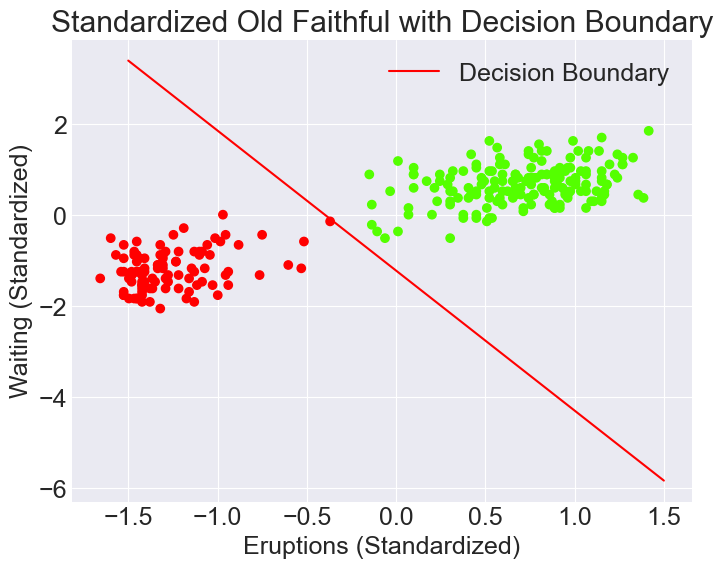

In [171]:
x_i = np.linspace(-1.5, 1.5, 200)
y_i = -transformed_weights[0] * x_i - transformed_bias

plt.figure(figsize=(8, 6))
plt.plot(x_i, y_i, label="Decision Boundary", color='red')  # Decision boundary
plt.scatter(features_standardized[:, 0], features_standardized[:, 1], c=output_classes, cmap='prism')
plt.title("Standardized Old Faithful with Decision Boundary")
plt.xlabel("Eruptions (Standardized)")
plt.ylabel("Waiting (Standardized)")
plt.legend()
plt.show()

## Task 3: Perceptron: A neural network with a different activation function

In this task, you will apply ADALINE to a larger dataset ([Ionosphere dataset](https://archive.ics.uci.edu/dataset/52/ionosphere)) and compare the performance of ADALINE with another binary classification neural network . A **Perceptron** is a single-layer neural network that works exactly the same as ADALINE, except it uses a different network activation function (`netAct`). The activation function computes the `netAct` as follows:

$$\text{netAct}_i = f(\text{netIn}_i) = 1  \text{ if netIn}_i \geq 0$$
$$\text{netAct}_i = f(\text{netIn}_i) = -1 \text{ if netIn}_i < 0$$

### 3a. Implement and test a Perceptron

1. Create a new class in `adaline.py` that will represent your Perceptron classifier. It should inherit from `Adaline`. Override/write any necessary functions. **Hint:** This should be really quick, short, and simple.
2. In the cell below, train your Perceptron on the same standardized Old Faithful data by making loss and accuracy plots like you have been using in previous tasks (*though you should replace the default title in `plot_adaline_train` with Perceptron*).

If everything is working, you should get very similar results with your Perceptron as above with ADALINE.

In [129]:
from adaline import Perceptron

ImportError: cannot import name 'Perceptron' from 'adaline' (C:\Users\veerk\Desktop\Computer Science\CS343\Project 1\adaline.py)

In [ ]:
# YOUR CODE HERE

In [ ]:
# YOUR CODE HERE

### 3b. Compare performance between ADALINE and Perceptron on Ionosphere dataset

Your goal is to train, compare, and analyze the performance of your ADALINE and Perceptron networks on the Ionosphere dataset.

The [Ionosphere dataset](https://archive.ics.uci.edu/dataset/52/ionosphere) is radar signal data collected in Goose Bay, Labrador. It is a more complex dataset than old faithful, with 33 features (but still 2 classes). The class values are coded 'g' for good radar signal and 'b' for bad radar signal.

**Please download the CSV file from the CS343 project website (not above UCI link)** — I have slightly modified the dataset for your convenience.

**TODO:**
1. Load in and normalize the Ionosphere dataset by standardization. Note that there are no headers in the CSV file and the class values are specified in the last column — **make sure that they are coded properly** (i.e. $-1$ and $+1$).
2. In the cell below, use the provided `plot_nets_train` helper function to create a 1x2 plot showing training loss and accuracy of the two networks.

Your goal is to play with the hyperparameters until both networks **start** plateauing in accuracy. Your accuracy doesn't literally need to stop increasing — you just want the visual impression of it doing so. Don't train the networks too long so that you miss the early trend in loss and/or accuracy.

In [ ]:
def plot_nets_train(loss_lists, acc_lists, net_names, plotMarkers=False):
    '''Creates a 1x2 grid of plots showing loss over epochs (left column) and
    accuracy over epochs (right column) for one or more network (num_nets in total).
    Generalizes `plot_adaline_train` for multiple trained networks.

    For example, in the case of two networks (e.g. adaline and perceptron; num_nets=2),
    there would be two curves in each of the two plots.

    Put differently, the following function call would produce the same pair of plots you've
    been getting up until this point with a single adaline network:
        plot_adaline_train(loss_lists[0], acc_lists[0])

    Parameters:
    -----------
    loss_lists: Python lists of ndarrays. len(loss_lists) = num_nets. len(loss_lists[0]) = n_epochs.
        This would be a list of the loss histories for each of the nets being plotted.
    acc_lists: Python lists of ndarrays. len(acc_lists) = num_nets. len(acc_lists[0]) = n_epochs.
        This would be a list of the accuracy histories for each of the nets being plotted.
    net_names: Python list of str. len(net_names) = num_nets.
        Identifying names of each net (e.g. for legend).
    plotMarkers: boolean.
        Should we draw a plot marker at each epoch on each curve?
    '''
    n_nets = len(net_names)
    n_epochs = len(loss_lists[0])

    colors = ['orange', 'blue', 'red']

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    fig.suptitle(f'{n_nets} networks trained for ({n_epochs} epochs)')

    for loss_list, acc_list, color in zip(loss_lists, acc_lists, colors):
        x = np.arange(1, n_epochs+1)

        curveStr = '-'
        if plotMarkers:
            curveStr += 'o'

        ax1.plot(x, loss_list, curveStr, c=color)
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss (Sum squared error)')
        ax2.plot(x, acc_list, curveStr, c=color)
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')

    plt.legend(net_names)
    plt.show()

In [ ]:
# YOUR CODE HERE

#### Questions

**Question 8.** What accuracy are you able to achieve on the Ionosphere dataset with each networks at the end of training?

**Answer 8:** 

YOUR ANSWER HERE

### 3c. Influence of learning rate

Now let's analyze the effect learning rate on the nets. Make plots that illustrate the effect of the following on ADALINE and Perceptron learning.

1. learning rate increased by 1+ order of magnitude in each network.
2. learning rate decreased by 1+ order of magnitude in each network. *You will likely need to increase the number of training epochs too.*

#### Questions

**Question 9:** Interpret the difference in behavior between the two nets.

In [ ]:
# YOUR CODE HERE

In [ ]:
# YOUR CODE HERE

**Answer 9:**

YOUR ANSWER HERE

### 3d. Plotting classifications

Make two scatter plots (one per network) showing the feature at index 4 on x-axis and the feature at index 19 on the y-axis. Samples should be color coded one of two colors: whether the class was correctly or incorrectly predicted.


In [ ]:
# YOUR CODE HERE


#### Questions

**Question 10:** In your scatter plots showing correct and incorrect sample classifications, how is it possible that misclassifications are so dispersed and do not appear to either side of a simple boundary?

**Answer 10:** 

YOUR ANSWER HERE